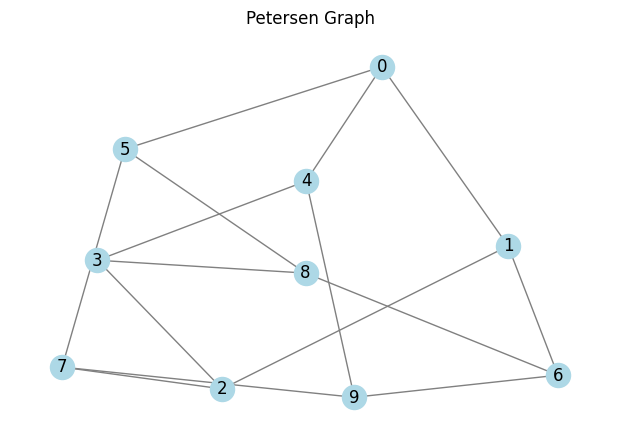


k = 3 connectivity level:
  Component 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

k = 2 connectivity level:
  Component 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

k = 1 connectivity level:
  Component 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.connectivity import k_components

# Create a graph — using the Petersen graph for illustration
G = nx.petersen_graph()

# Draw the graph
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Petersen Graph")
plt.show()

# Compute k-components
k_comps = k_components(G)

# Display k-components
for k, components in k_comps.items():
    print(f"\nk = {k} connectivity level:")
    for i, comp in enumerate(components, 1):
        print(f"  Component {i}: {sorted(comp)}")



===== Erdős-Rényi (Gnp) =====
Graph is not connected. Skipping k-components.


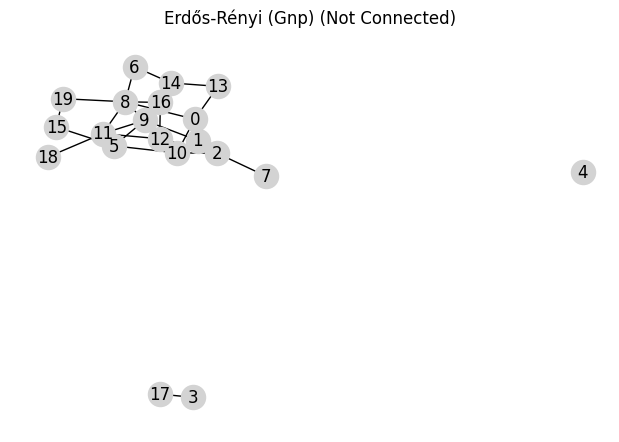


===== Barabási-Albert =====

k = 2 connectivity level:
  Component 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

k = 1 connectivity level:
  Component 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


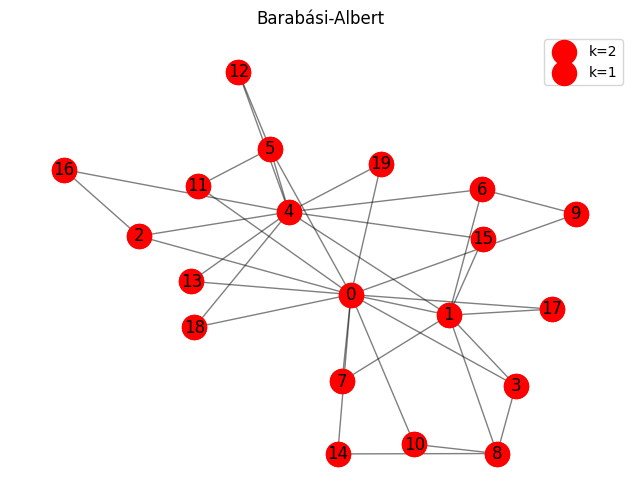


===== Watts-Strogatz =====

k = 3 connectivity level:
  Component 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19]

k = 2 connectivity level:
  Component 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

k = 1 connectivity level:
  Component 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


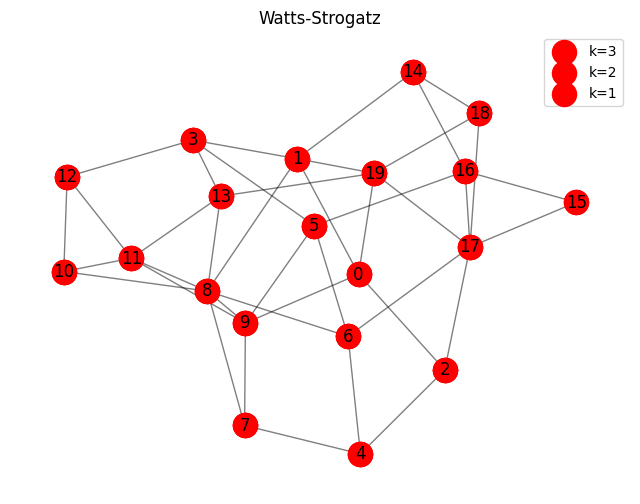

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import random

from networkx.algorithms.connectivity import k_components

# Function to display k-components with different colors
def draw_k_components(G, k_comps, title="Graph with k-components"):
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8, 6))
    used_nodes = set()
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'brown']
    
    for k, comps in sorted(k_comps.items(), reverse=True):
        print(f"\nk = {k} connectivity level:")
        for i, comp in enumerate(comps):
            print(f"  Component {i+1}: {sorted(comp)}")
            color = colors[i % len(colors)]
            nx.draw_networkx_nodes(G, pos, nodelist=comp, node_color=color, label=f'k={k}')
            used_nodes.update(comp)
    
    # Draw the rest of the graph in gray if not part of any component
    remaining = set(G.nodes()) - used_nodes
    if remaining:
        nx.draw_networkx_nodes(G, pos, nodelist=list(remaining), node_color='gray', label='Other')

    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos)
    plt.title(title)
    plt.axis('off')
    plt.legend()
    plt.show()

# Generate and analyze different random graphs
graphs = {
    "Erdős-Rényi (Gnp)": nx.erdos_renyi_graph(n=20, p=0.15, seed=42),
    "Barabási-Albert": nx.barabasi_albert_graph(n=20, m=2, seed=42),
    "Watts-Strogatz": nx.watts_strogatz_graph(n=20, k=4, p=0.3, seed=42)
}

# Run and visualize k-components for each graph
for name, G in graphs.items():
    print(f"\n===== {name} =====")
    if nx.is_connected(G):
        k_comps = k_components(G)
        draw_k_components(G, k_comps, title=name)
    else:
        print("Graph is not connected. Skipping k-components.")
        plt.figure(figsize=(6, 4))
        nx.draw(G, with_labels=True, node_color='lightgray')
        plt.title(f"{name} (Not Connected)")
        plt.axis('off')
        plt.show()





k = 3 connectivity level:
  Component 1: [0, 1, 4, 5]
  Component 2: [0, 2, 6, 7]
  Component 3: [0, 3, 8, 9]
  Component 4: [1, 2, 10, 11]
  Component 5: [2, 3, 12, 13]

k = 2 connectivity level:
  Component 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

k = 1 connectivity level:
  Component 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


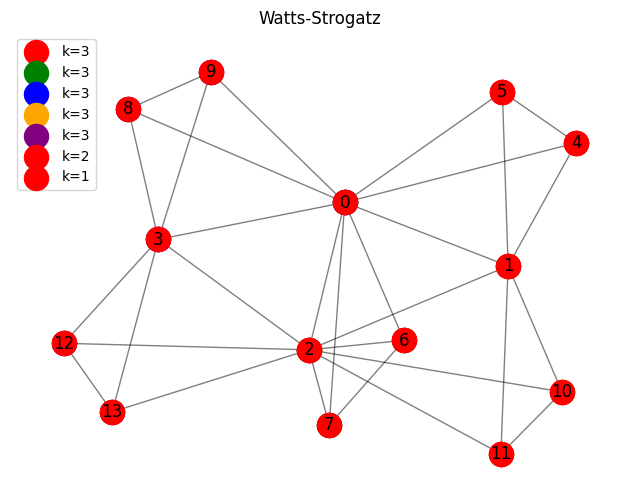


k = 3 connectivity level:
  Component 1: [0, 1, 4, 5]
  Component 2: [0, 2, 6, 7]
  Component 3: [0, 3, 8, 9]
  Component 4: [1, 2, 10, 11]
  Component 5: [2, 3, 12, 13]

k = 2 connectivity level:
  Component 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

k = 1 connectivity level:
  Component 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


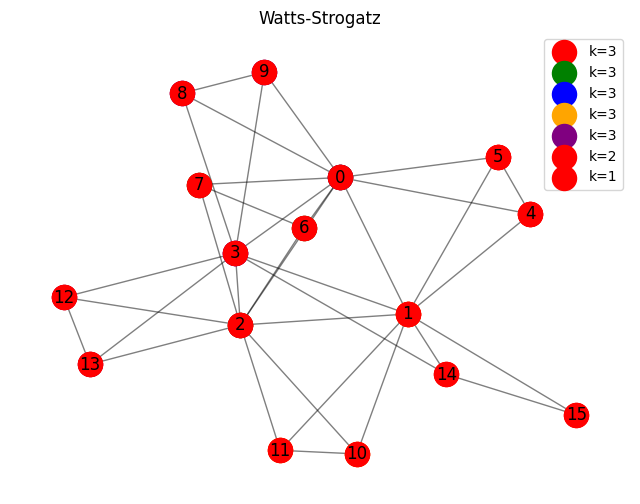

In [5]:
## G10 ##

# Create the graph
G10_new = nx.Graph()

# Add central nodes
central_nodes = [0, 1, 2, 3]
G10_new.add_nodes_from(central_nodes)

# Define additional nodes for K4s (shifted by -1)
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3)]
extra_nodes = {pair: (i, i + 1) for i, pair in zip(range(4, 16, 2), pairs)}

# Add edges for each K4 structure
for (a, b), (x, y) in extra_nodes.items():
    G10_new.add_edges_from([(a, b), (a, x), (a, y), (b, x), (b, y), (x, y)])


k_comps = k_components(G10_new)
draw_k_components(G10_new, k_comps, title=name)

## G11 ##

# Create the graph
G11 = G10_new.copy()
G11.add_nodes_from([14, 15])
G11.add_edges_from([(1, 3), (3, 14), (1, 14), (1, 15), (15, 14)])  


k_comps = k_components(G11)
draw_k_components(G11, k_comps, title=name)